### Experiment Analysis — GMV & Growth Metrics

This notebook evaluates experiment performance using:
- Aggregated metrics
- Visual inspection
- Difference-in-differences analysis



In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

orders = pd.read_csv("../data/processed/orders_enriched.csv", parse_dates=["InvoiceDate"])
customers = pd.read_csv("../data/processed/customers_growth_metrics.csv")

Build experiment metrics table

In [15]:
experiment_metrics = (
    orders
    .merge(customers, on="CustomerID")
    .groupby(["experiment_group", "period"])
    .agg(
        orders=("InvoiceNo", "nunique"),
        gmv=("order_gmv", "sum"),
        avg_order_value=("order_gmv", "mean")
    )
    .reset_index()
)

experiment_metrics


,experiment_group,period,orders,gmv,avg_order_value
0,control,post,2517,1113070.000,441.694444
1,control,pre,7196,3219305.361,446.877479
2,treatment,post,2377,1309574.500,550.935844
3,treatment,pre,6442,3269458.043,506.029723


GMV

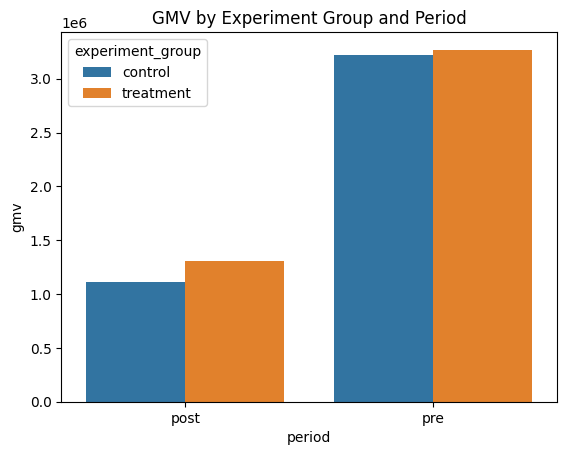

In [16]:
sns.barplot(
    data=experiment_metrics,
    x="period",
    y="gmv",
    hue="experiment_group"
)
plt.title("GMV by Experiment Group and Period")
plt.show()


Orders

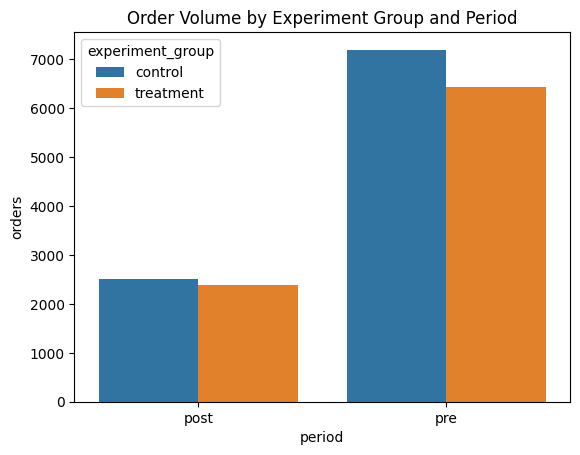

In [17]:
sns.barplot(
    data=experiment_metrics,
    x="period",
    y="orders",
    hue="experiment_group"
)
plt.title("Order Volume by Experiment Group and Period")
plt.show()


Difference-in-Differences

In [18]:
pivot = experiment_metrics.pivot(
    index="experiment_group",
    columns="period",
    values="gmv"
).reset_index()

pivot["gmv_change"] = pivot["post"] - pivot["pre"]

treatment_effect = (
    pivot.loc[pivot["experiment_group"] == "treatment", "gmv_change"].values[0]
    - pivot.loc[pivot["experiment_group"] == "control", "gmv_change"].values[0]
)

treatment_effect


146351.81799999997